# CNN MNIST

epoch_number    : 0
cost_this_epoch : 87.86233005626127

epoch_number    : 1
cost_this_epoch : 26.177967198658735

epoch_number    : 2
cost_this_epoch : 16.98960786871612

epoch_number    : 3
cost_this_epoch : 12.361900679185055

epoch_number    : 4
cost_this_epoch : 9.42202609006199

epoch_number    : 5
cost_this_epoch : 6.9141965548551525

epoch_number    : 6
cost_this_epoch : 5.783200308324012

epoch_number    : 7
cost_this_epoch : 5.265113076149646

epoch_number    : 8
cost_this_epoch : 4.338863955266788

epoch_number    : 9
cost_this_epoch : 3.655246197977249

epoch_number    : 10
cost_this_epoch : 3.3020213126428644

epoch_number    : 11
cost_this_epoch : 2.6321259147011915

epoch_number    : 12
cost_this_epoch : 2.524845915135529

epoch_number    : 13
cost_this_epoch : 2.942276232412496

epoch_number    : 14
cost_this_epoch : 1.4514882932434716

Test Accuracy:  0.99139994
[[ 977    0    0    0    0    0    0    2    1    0]
 [   0 1134    0    0    0    0    0    1    0    0]
 [

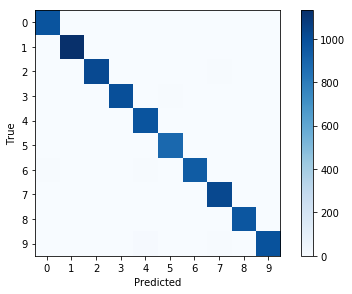

<Figure size 432x288 with 0 Axes>

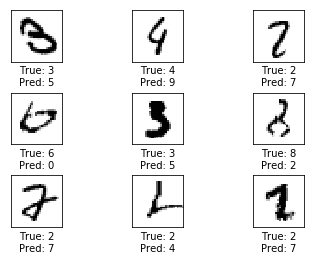

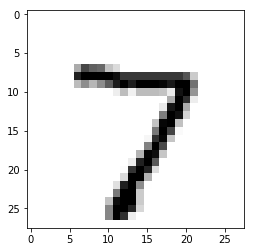

<Figure size 432x288 with 0 Axes>

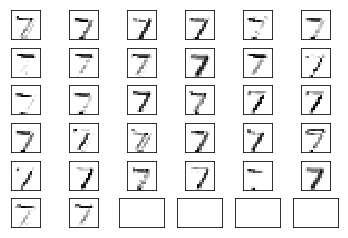

<Figure size 432x288 with 0 Axes>

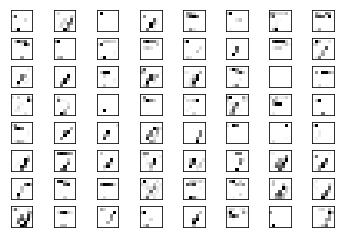

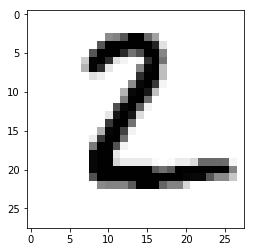

<Figure size 432x288 with 0 Axes>

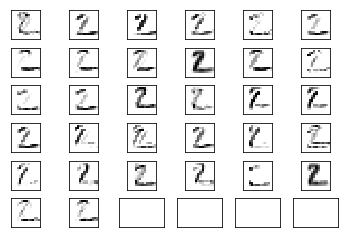

<Figure size 432x288 with 0 Axes>

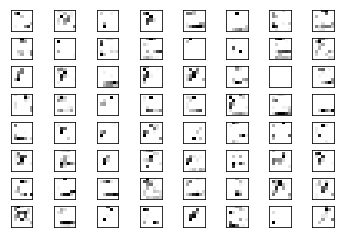

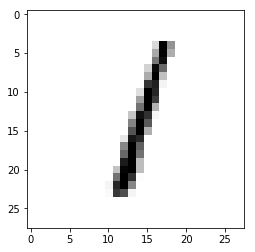

<Figure size 432x288 with 0 Axes>

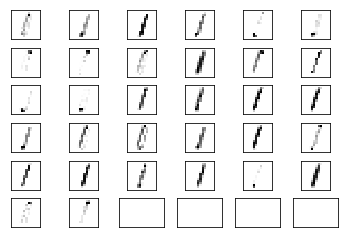

<Figure size 432x288 with 0 Axes>

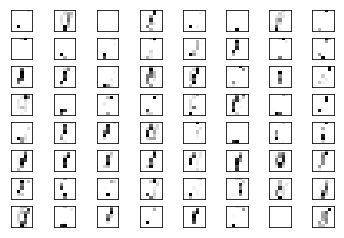

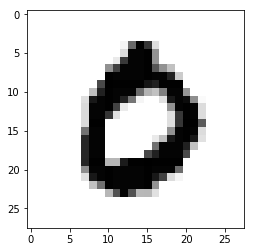

<Figure size 432x288 with 0 Axes>

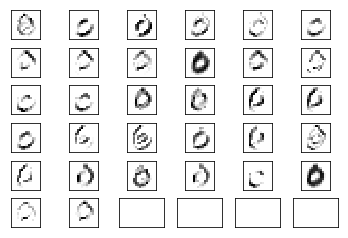

<Figure size 432x288 with 0 Axes>

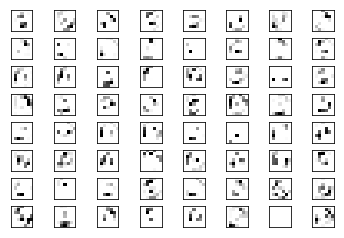

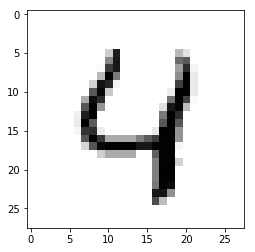

<Figure size 432x288 with 0 Axes>

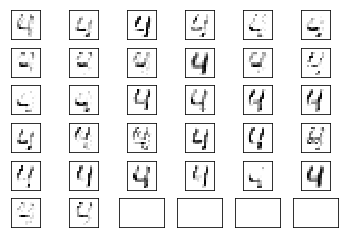

<Figure size 432x288 with 0 Axes>

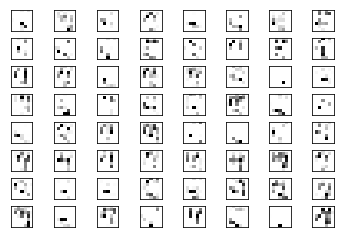

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from copy import deepcopy
from sklearn.metrics import confusion_matrix

import utils

# this line should be commented out for regular python run 
%matplotlib inline  
# this line should be commented out for regular python run 


""" Hyperparameter """
data_size_train = 60000
data_size_test = 10000
batch_size = 100
lr = 1e-3
epoch = 15


""" Data Loading """
def load_mnist():
    mnist = tf.keras.datasets.mnist
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    x_train, x_test = x_train / 255.0, x_test / 255.0
    x_train, x_test = x_train.astype(np.float32), x_test.astype(np.float32)
    x_train, x_test = x_train.reshape((-1, 28, 28, 1)), x_test.reshape((-1, 28, 28, 1))

    y_train_cls = deepcopy(y_train).astype(np.int32)
    y_test_cls = deepcopy(y_test).astype(np.int32)

    y_train = np.eye(10)[y_train].astype(np.float32)
    y_test = np.eye(10)[y_test].astype(np.float32)

    data = (x_train, x_test, y_train, y_test, y_train_cls, y_test_cls)

    return data

# x_train.shape     :  (60000, 28, 28, 1)
# x_test.shape      :  (10000, 28, 28, 1)
# y_train.shape     :  (60000, 10)
# y_test.shape      :  (10000, 10)
# y_train_cls.shape :  (60000,)
# y_test_cls.shape  :  (10000,)
data = load_mnist()
x_train, x_test, y_train, y_test, y_train_cls, y_test_cls = data


""" Graph Construction """
tf.random.set_random_seed(337)

# placeholders
x = tf.placeholder(tf.float32, shape=(None, 28, 28, 1), name='x')
y = tf.placeholder(tf.float32, shape=(None, 10), name='y')
y_cls = tf.placeholder(tf.int32, shape=(None,), name='y_cls')

# weights and layers #################################################################

# convolution layer 1
# input and input.shape:   x,     (None, 28, 28, 1)
# output and output.shape: conv1, (None, 14, 14, 32)
conv1_W = tf.get_variable("conv1_W", \
                          shape=(3,3,1,32), \
                          initializer=tf.truncated_normal_initializer(stddev=0.1))
conv1 = tf.nn.conv2d(x, conv1_W, strides=(1,1,1,1), padding='SAME') # (None, 28, 28, 32)
conv1 = tf.nn.relu(conv1) # (None, 28, 28, 32)
conv1 = tf.nn.max_pool(conv1, ksize=(1,2,2,1), strides=(1,2,2,1), \
                       padding='SAME') # (None, 14, 14, 32)

# convolution layer 2
# input and input.shape:   conv1, (None, 14, 14, 32)
# output and output.shape: conv2, (None, 7, 7, 64)
conv2_W = tf.get_variable("conv2_W", \
                          shape=(3,3,32,64), \
                          initializer=tf.truncated_normal_initializer(stddev=0.1))
conv2 = tf.nn.conv2d(conv1, conv2_W, strides=(1,1,1,1), \
                     padding='SAME') # (None, 14, 14, 64)
conv2 = tf.nn.relu(conv2) # (None, 14, 14, 64)
conv2 = tf.nn.max_pool(conv2, ksize=(1,2,2,1), strides=(1,2,2,1), \
                       padding='SAME') # (None, 7, 7, 64)

# fully connected layer
# input and input.shape:   conv2, (None, 7, 7, 64)
# output and output.shape: fc,    (None, 256) 
flatten = tf.reshape(conv2, (-1, 3136)) # (None, 3136) 
fc_W = tf.get_variable("fc_W", \
                        shape=(3136,256), \
                        initializer=tf.truncated_normal_initializer(stddev=0.1))
fc = tf.matmul(flatten, fc_W) # (None, 256) 
fc = tf.nn.relu(fc) # (None, 256) 

# output layer
# input and input.shape:   fc,     (None, 256) 
# output and output.shape: logits, (None, 10) 
out_W = tf.get_variable("out_W", \
                        shape=(256, 10), \
                        initializer=tf.truncated_normal_initializer(stddev=0.1))
logits = fc @ out_W # (None, 10) 

# weights and layers #################################################################

# y_pred, and y_pred_cls 
y_pred = tf.nn.softmax(logits, name='y_pred') # probabilities
y_pred_cls = tf.cast(tf.argmax(logits, axis=1), tf.int32)

# cross_entropy cost function
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,
                                                           labels=y)
cost = tf.reduce_mean(cross_entropy)

# optimizer
train_op = tf.train.AdamOptimizer(learning_rate=lr).minimize(cost)

# test accuracy
# you have to put test sets to compute test_accuracy
correct_bool = tf.equal(y_cls, y_pred_cls)
test_accuracy = tf.reduce_mean(tf.cast(correct_bool, tf.float32))


""" Train and Test """
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    
    
    # run gradient descent
    for i in range(epoch):
        if 1:
            # perform random permutaion
            idx = np.random.permutation(np.arange(data_size_train)) 
            x_batch = x_train[idx]
            y_batch = y_train[idx]
        else:
            # don't perform random permutaion
            x_batch = x_train
            y_batch = y_train
            
        cost_this_epoch = 0
        for batch_number in range(int(data_size_train/batch_size)): 
            x_b = x_batch[batch_number*batch_size:(batch_number+1)*batch_size]
            y_b = y_batch[batch_number*batch_size:(batch_number+1)*batch_size]
            feed_dict = {x: x_b, y: y_b}
            _, cost_now = sess.run([train_op, cost], feed_dict=feed_dict)
            cost_this_epoch += cost_now
            
        print('epoch_number    :', i)
        print('cost_this_epoch :', cost_this_epoch)
        print()

            
    # compute test accuracy and print confusion matrix 
    x_data = x_test
    y_data = y_test
    y_cls_data = y_test_cls
    y_test_cls_pred = np.zeros(shape=(data_size_test), dtype=np.int32)
    test_accuracy_list = []
    for batch_number in range(int(data_size_test/batch_size)): 
        x_b = x_data[batch_number*batch_size:(batch_number+1)*batch_size]
        y_b = y_data[batch_number*batch_size:(batch_number+1)*batch_size]
        y_cls_b = y_cls_data[batch_number*batch_size:(batch_number+1)*batch_size]
        feed_dict = {x: x_b, y: y_b, y_cls: y_cls_b}
        test_accuracy_temp, y_test_cls_pred_now = sess.run([test_accuracy, y_pred_cls],
                                                           feed_dict=feed_dict)
        test_accuracy_list.append(test_accuracy_temp)
        y_test_cls_pred[batch_number*batch_size:(batch_number+1)*batch_size] = \
            y_test_cls_pred_now
        
    print('Test Accuracy: ', np.mean(np.array(test_accuracy_list)))
    
    cm = confusion_matrix(y_true=y_test_cls, y_pred=y_test_cls_pred)
    print(cm)

    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange(10)
    plt.xticks(tick_marks, range(10))
    plt.yticks(tick_marks, range(10))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    plt.savefig('img/cm.png')
    plt.close()
    
    
    # collect info of first 9 test images with false prediction
    images = []
    cls_true = []
    cls_pred = []
    img_shape = (28, 28)
    num_false_prediction = 0
    i = 0
    while num_false_prediction < 9:
        x_b = [x_test[i]] # (1, 28, 28, 1)
        y_b = [y_test[i]] # (1, 10)
        y_cls_b = [y_test_cls[i]] # (1,)
        feed_dict = {x: x_b, y: y_b, y_cls: y_cls_b}
        bool_now, y_pred_cls_now = sess.run([correct_bool, y_pred_cls], \
                                            feed_dict=feed_dict)
        if bool_now[0] == False:
            images.append(x_b[0])
            cls_true.append(y_cls_b[0])
            cls_pred.append(y_pred_cls_now[0])
            num_false_prediction += 1
        i += 1
    images = images[0:9]
    cls_true = cls_true[0:9]
    cls_pred = cls_pred[0:9]

        
    # plot 9 test images with false prediction
    n = len(images)
    sqrt_n = int(np.ceil(np.sqrt(n)))
    
    plt.figure()
    fig, axes = plt.subplots(sqrt_n, sqrt_n)
    if cls_pred is None:
        hspace = 0.3
    else:
        hspace = 0.6
    fig.subplots_adjust(hspace=hspace, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        if i < n:
            ax.imshow(images[i].reshape(img_shape), cmap='binary')

            if (cls_true is not None) and (cls_pred is not None):
                xlabel = "True: {0}\nPred: {1}".format(cls_true[i], cls_pred[i])
            elif (cls_true is not None) and (cls_pred is None):
                xlabel = "True: {0}".format(cls_true[i])
            elif (cls_true is None) and (cls_pred is not None):
                xlabel = "Pred: {0}".format(cls_pred[i])
            else:
                xlabel = ""
            ax.set_xlabel(xlabel)

        ax.set_xticks([])
        ax.set_yticks([])

    plt.show()
    
    
    # plot_test_images_in_input_conv1_conv2_layers(self, num_test_images=2):
    num_test_images = 5
    for i in range(num_test_images):
        image0 = x_test[i]
        utils.plot_one_image(image0, (28,28), cls_true=None, cls_pred=None)

        feed_dict = {x: [image0]}
        image0_layer1, image0_layer2 = sess.run([conv1, conv2], feed_dict=feed_dict)
        
        # image0_layer1.shape = (1, 14, 14, 32)
        # image0_layer2.shape = (1, 7, 7, 64)
        image0_layer1 = image0_layer1[0]
        image0_layer2 = image0_layer2[0]

        utils.plot_many_images_3d(image0_layer1)
        utils.plot_many_images_3d(image0_layer2)